In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import fashion_mnist as fm

C:\Users\f4020\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
from ipywidgets import interact_manual

In [6]:
def show_data(n):
    plt.imshow(x_train[n], cmap = "Greys")
    print("This is a :", class_names[y_train[n]])

interactive(children=(IntSlider(value=29999, description='n', max=59999), Button(description='Run Interact', s…

<function __main__.show_data(n)>

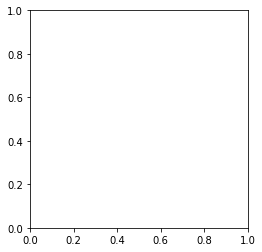

In [7]:
interact_manual(show_data, n=(0,59999))


In [8]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)


In [11]:
y_test = to_categorical(y_test, 10)


In [12]:
def syt(n):
    print(y_train[n])
interact_manual(syt, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.syt(n)>

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [26]:
model = Sequential()


In [27]:
model.add(Dense(200, input_dim = 784, activation = "relu"))


In [28]:
model.add(Dense(50, activation = "relu"))

In [29]:
model.add(Dense(10, activation = "softmax"))


In [31]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [32]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(x_train, y_train, batch_size=25, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0553 - acc: 0.6111
Epoch 2/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0321 - acc: 0.7889
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0275 - acc: 0.8157
Epoch 4/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0253 - acc: 0.8293
Epoch 5/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0241 - acc: 0.8375
Epoch 6/10
60000/60000 [==============================] - 16s 269us/sample - loss: 0.0231 - acc: 0.8430
Epoch 7/10
60000/60000 [==============================] - 20s 326us/sample - loss: 0.0224 - acc: 0.8493
Epoch 8/10
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0218 - acc: 0.8525
Epoch 9/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0212 - acc: 0.8569
Epoch 10/10
60000/60000 [==============================] - 9s 15

In [34]:
result = model.predict_classes(x_test)


In [35]:
n = 9487
print('神經網路預測是:', class_names[result[n]])

神經網路預測是: Coat


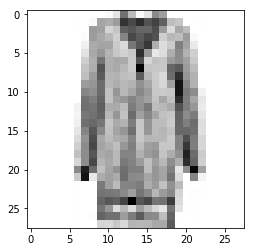

In [36]:
plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
